# GPA Growth Analysis

### Methodology
* Used data from Fall 2017-18 and Spring 2018-19 for Class of 2021 students.
* Only included students who had GPA data entered for *both* their Fall 2017-18 and Spring 2018-19 terms


### Notes
* After filtering for students who had complete GPA data, Denver only had 8 students included. Their data suggest a positive trend, but given the small sample size any trend should not be taken as a strong indicator of success.

### Observations
* Ignoring Denver, Aurora, New Orleans, Sacramento, San Francisco, and Watts saw positive increases in their average GPAs.
* Aurora saw the highest growth followed by San Francisco.
* Aurora's growth was driven by a strong improvement among students who were near a 3.5 GPA in their first semester but by the end of their Spring 2018-19 term had increased their GPA above 3.5.
* San Francisco's growth, by comparison, was driven by increasing the GPA of the students who started at College Track with a 2.5 GPA or below.

In [4]:
import pandas as pd
from pathlib import Path
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.pylab as pylab
from textwrap import fill
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter

sns.set(style="white")

In [5]:
%matplotlib inline

In [6]:
in_file = Path.cwd() / "data" / "processed" / "processed_data.pkl"
report_dir = Path.cwd() / "reports"

In [7]:
df = pd.read_pickle(in_file)

In [9]:
gpa_mean = df.pivot_table(
    index=["Site", "student_year"], values=["GPA"], aggfunc="mean"
)
gpa_mean = gpa_mean.reset_index()

In [ ]:
g = sns.catplot(
    x="Site",
    y="GPA",
    hue="student_year",
    data=gpa_mean,
    kind="bar",
    palette="muted",
    legend_out=False,
    alpha=1,
)

for ax in g.axes.ravel():
    for p in ax.patches:
        ax.annotate(
            "%.2f" % p.get_height(),
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="center",
            fontsize=14,
            color="black",
            rotation=0,
            xytext=(0, -10),
            textcoords="offset points",
        )
    ax.set_title("Average GPA Fall 2017-18 Term vs Spring 2018-19\n", fontsize=22)
    ax.set_xlabel("Site", fontsize=16)
    ax.set_ylabel("GPA", fontsize=16)
    ax.set_ylabel("GPA", fontsize=16)
    for label in ax.get_yticklabels():
        label.set_fontsize(14)
    for label in ax.get_xticklabels():
        label.set_fontsize(14)


leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
plt.setp(ax.get_legend().get_texts(), fontsize="14")  # for legend text
fig = plt.gcf()
fig.set_size_inches(15, 8)

In [14]:
def generate_histrogam_chart(df):
    fig, axes = plt.subplots(
        3, 3, figsize=(12, 12.75), dpi=100, sharex=True, sharey=True
    )
    bar_width = 0.40
    ind = np.arange(5)
    for i, (ax, site) in enumerate(zip(axes.flatten(), sorted(df["Site"].unique()))):

        x = df.loc[
            (df["Site"] == site) & (df["student_year"] == "Fall 2017-18"), "GPA Bucket"
        ].value_counts(normalize=True)

        x_year_2 = df.loc[
            (df["Site"] == site) & (df["student_year"] == "Spring 2018-19"),
            "GPA Bucket",
        ].value_counts(normalize=True)
        x = x.reindex(
            index=["Below 2.5", "2.5 to 2.74", "2.75 to 2.99", "3.0 to 3.49", "3.5+"]
        )

        x_year_2 = x_year_2.reindex(
            index=["Below 2.5", "2.5 to 2.74", "2.75 to 2.99", "3.0 to 3.49", "3.5+"]
        )

        ax.bar(x.index, x, alpha=1, width=bar_width)
        ax.bar(ind + bar_width, x_year_2, alpha=1, width=bar_width)
        ax.set_title(str(site), fontsize=16)
        ax.set_xlabel("GPA", fontsize=16)
        ax.set_ylabel("% of Students", fontsize=16)

        ax.xaxis.set_tick_params(rotation=45, labelsize=16)

        ax.yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))

        ax.label_outer()

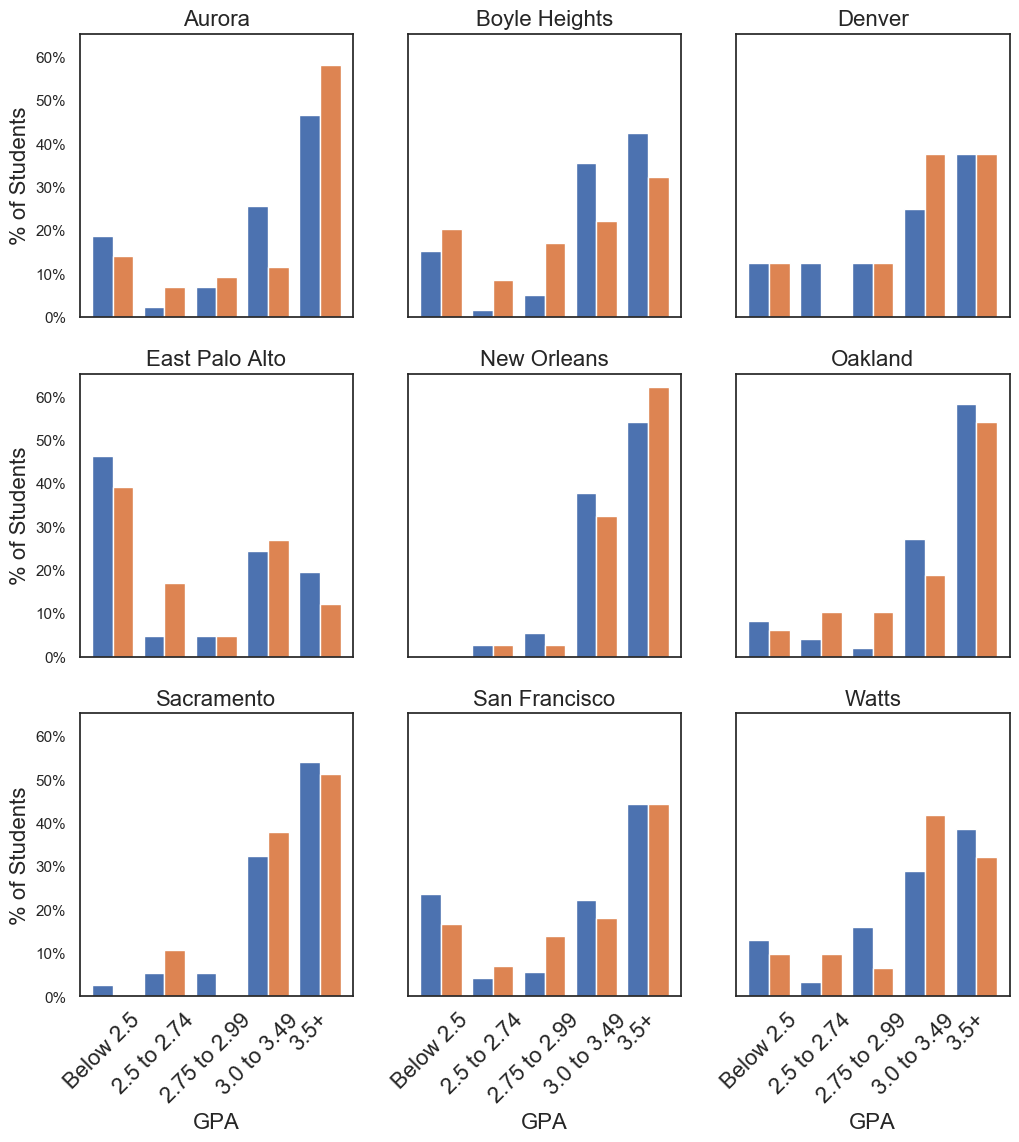

In [15]:
generate_histrogam_chart(df)